# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [6]:
# your answer here
temp.info()

# Los datos que obtenemos son de tipo string y flot, lo cual se corresponde correctamente a los datos del DF. Ademas, 
# podemos ver que no tenemos datos nulos. La tabla tiene informacion de las temperaturas de ciertas ciudades

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [9]:
# your answer here
rows_New_York = temp[temp['State'] == 'New York'].index
temp[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [10]:
# your answer here
temp.loc[rows_New_York, 'Temperature'].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [13]:
# your answer here
temp[temp['Temperature'] > 15].sort_values('Temperature')

,City,State,Temperature
3,Hartford,Connecticut,17.222222
0,NYC,New York,19.444444
6,Newark,New Jersey,20.000000
5,Treton,New Jersey,22.222222


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [17]:
# your answer here
temp[temp['Temperature'] > 15]['City'].to_frame()

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [19]:
# your answer here
temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)][['City', 'Temperature']]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [28]:
# your answer here
# Mean
temp.groupby('State').mean()

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [22]:
# STD
temp.groupby('State').agg({'Temperature': 'std'}) # Otra forma de hacerlo con agg

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [25]:
# your answer here
employee = pd.read_csv('employee.csv')
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Explore the data types of the Temp dataframe. Comment your results

In [28]:
# your answer here
employee.info()

# Tenemos datos de tipos categoricos y numericos y estan asignados correctamente. El dataframe esta compuesto por 
# 7 columnas y 9 filas y no posee elementos nulos. Podemos ver que contiene la informacion de los trabajadores de
# una empresa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### What's the average salary in this company?

In [33]:
employee.columns

Index(['Name', 'Department', 'Education', 'Gender', 'Title', 'Years',
       'Salary'],
      dtype='object')

In [34]:
# your answer here
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [35]:
# your answer here
employee['Salary'].max()

70

#### What's the lowest salary?

In [36]:
# your answer here
min_salary = employee['Salary'].min()
min_salary

30

#### Who are the employees with the lowest salary?

In [37]:
# your answer here
employee[employee['Salary'] == min_salary]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [38]:
# your answer here
employee[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [39]:
# your answer here
employee[employee['Name'] == 'David']['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [40]:
# your answer here
employee[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [41]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [44]:
# your answer here- 2nd method
employee.loc[0:2, :]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [46]:
# your answer here- 3nd method
employee.iloc[0:3, :]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [47]:
# your answer here
employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [49]:
# your answer here
employee.groupby('Years').mean('Salary')

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [58]:
# your answer here
employee.groupby('Title').mean('Salary').iloc[:, 1].sort_values(ascending=False).to_frame()

,Salary
Title,
VP,70.000000
associate,56.666667
analyst,32.500000


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

Years
AxesSubplot(0.125,0.125;0.775x0.755)


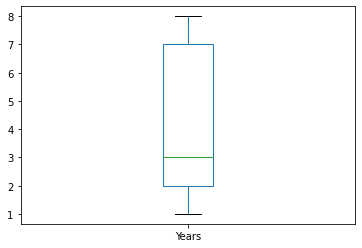

------------------------------------------------------------
Salary
AxesSubplot(0.125,0.125;0.775x0.755)


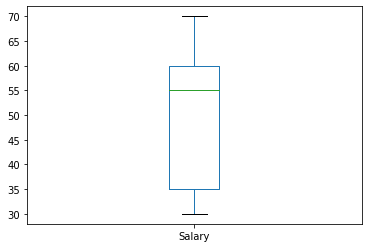

------------------------------------------------------------


In [61]:
# Mostramos los box plot para poder visualizar mejor los datos y ver si algunos se encuentra fuera de los bigotes

for col in employee._get_numeric_data():
    print(col)
    print(employee[col].plot.box())
    plt.show()
    print('------' * 10)

In [62]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


In [63]:
# print first quartile here
employee.describe().iloc[4, :].to_frame()

,25%
Years,2.0
Salary,35.0


In [64]:
# print third quartile here
employee.describe().iloc[6, :].to_frame()

,75%
Years,7.0
Salary,60.0


#### Is the mean salary per gender different?

In [65]:
# your answer here
employee.groupby('Gender').mean('Salary').iloc[:, 1].to_frame()

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [76]:
# your answer here
employee.groupby('Department').agg({'Years': ['mean', 'min', 'max'], 'Salary': ['mean', 'min', 'max']}).transpose()
# employee.groupby('Department').describe().transpose()

Department          HR     IT  Sales
Years  mean   4.666667   4.50    2.5
       min    2.000000   1.00    2.0
       max    8.000000   8.00    3.0
Salary mean  45.000000  48.75   55.0
       min   30.000000  30.00   55.0
       max   70.000000  70.00   55.0

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [85]:
# your answer here

employee.groupby('Department').agg({'Salary': lambda x: max(x)-min(x)})
# employee.groupby('Department')['Salary'].apply(lambda x: max(x)-min(x)).to_frame()

,Salary
Department,
HR,40
IT,40
Sales,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [86]:
# your answer here
orders = pd.read_csv('Orders.csv')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [88]:
# your answer here
orders.info()

# Tenemos datos numericos (enteros y flotantes) y categoricos. El dataframe esta compuesto por 14 columnas y 397924 filas
# no tenemos datos nulos. Por la informacion, se puede intuir que los datos corresponde a los datos de venta de una tienda
# ya que, tenemos informacion sobre cuanto gasto el cliente, la fecha de la compra, la cantidad de productor, entre otros.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [89]:
# your answer here
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


Unnamed: 0
AxesSubplot(0.125,0.125;0.775x0.755)


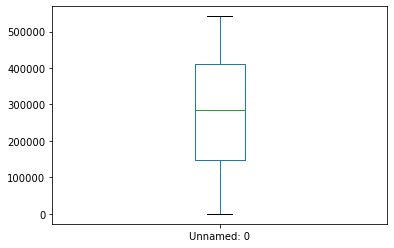

------------------------------------------------------------
InvoiceNo
AxesSubplot(0.125,0.125;0.775x0.755)


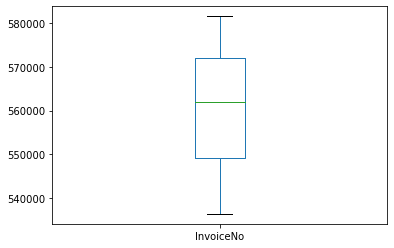

------------------------------------------------------------
year
AxesSubplot(0.125,0.125;0.775x0.755)


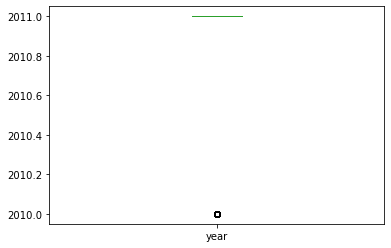

------------------------------------------------------------
month
AxesSubplot(0.125,0.125;0.775x0.755)


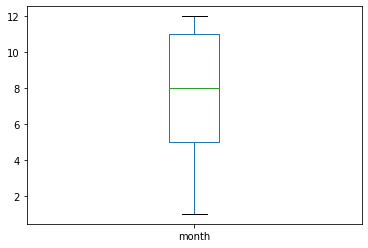

------------------------------------------------------------
day
AxesSubplot(0.125,0.125;0.775x0.755)


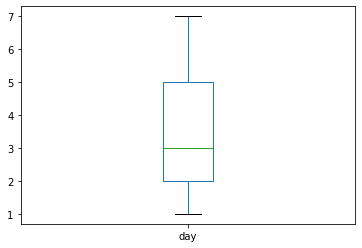

------------------------------------------------------------
hour
AxesSubplot(0.125,0.125;0.775x0.755)


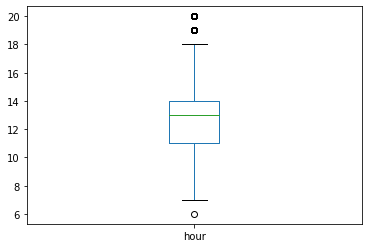

------------------------------------------------------------
Quantity
AxesSubplot(0.125,0.125;0.775x0.755)


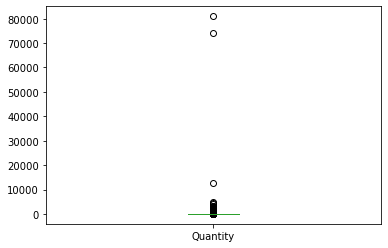

------------------------------------------------------------
UnitPrice
AxesSubplot(0.125,0.125;0.775x0.755)


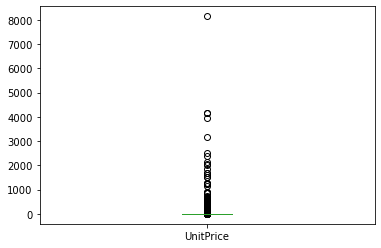

------------------------------------------------------------
CustomerID
AxesSubplot(0.125,0.125;0.775x0.755)


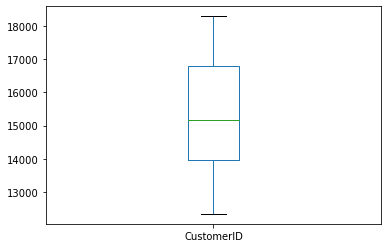

------------------------------------------------------------
amount_spent
AxesSubplot(0.125,0.125;0.775x0.755)


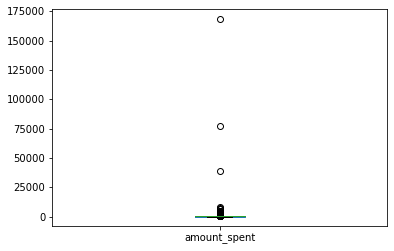

------------------------------------------------------------


In [91]:
# Mostramos los plot box para ver si tenemos datos fuera de nuestros bigotes.

for col in orders._get_numeric_data():
    print(col)
    print(orders[col].plot.box())
    plt.show()
    print('------' * 10)

In [93]:
# En las columnas Quantity, UnitPrice y amount_spend tenemos valores atipicos fuera de los bigotes como podemos
# ver en las graficas anteriores. 

####  What is the average Purchase Price?

In [94]:
orders.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'year', 'month', 'day', 'hour',
       'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'amount_spent'],
      dtype='object')

In [95]:
# your answer here
orders['amount_spent'].mean()

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [98]:
# your answer here

# highest purchase price
orders['amount_spent'].max()

168469.6

In [99]:
# your answer here

# lowest purchase price
orders['amount_spent'].min()

0.0

#### Select all the customers we have in Spain

In [104]:
# your answer here
# Obtenemos los ID de todos los clientes que compran desde España
clients = orders[orders['Country'] == 'Spain'].groupby('CustomerID').size().index

# Estos son los clientes de españa
clients 

Int64Index([12354, 12417, 12421, 12442, 12445, 12448, 12450, 12454, 12455,
            12462, 12484, 12502, 12507, 12510, 12538, 12539, 12540, 12541,
            12544, 12545, 12546, 12547, 12548, 12550, 12551, 12556, 12557,
            12596, 12597, 17097],
           dtype='int64', name='CustomerID')

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [105]:
# your answer here
len(clients)

30

#### Select all the customers who have bought more than 50 items ?

In [107]:
# your answer here
clientes = orders.groupby('CustomerID').agg({'Quantity': 'sum'})
clientes[clientes['Quantity'] > 50].sort_values('Quantity', ascending=False)

,Quantity
CustomerID,
14646,197491
16446,80997
14911,80515
12415,77670
12346,74215
...,...
14768,52
14890,51
15350,51


#### Select orders from Spain that are above 50 items

In [155]:
# your answer here

# El problema se puede entender de dos formas
# CASO 1: Si entendemos que cada fila por separado es un pedido diferente entonces, esta seria la respuesta

orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


In [153]:
# CASO 2: Si por orden entemos el pedido completo, entonces tendremos que agrupar los datos por factura
# y sumar la cantidad de los distintos productos pedidos.

orders_spain = orders[orders['Country'] == 'Spain'].groupby('InvoiceNo').agg({'Quantity': 'sum'})
orders_spain[orders_spain['Quantity'] > 50].sort_values('Quantity')

,Quantity
InvoiceNo,
560607,59
577125,62
559148,64
557303,64
538095,67
...,...
578321,920
571255,1006
540785,1008


#### Select all free orders

In [110]:
# your answer here
orders[orders['amount_spent'] == 0]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [112]:
# your answer here

orders.loc[orders['Description'].str.contains('lunch bag'), ['InvoiceNo', 'Description']]
# Contains nos devuelve true or false dependiendo de si la palabra se encuentra o no

,InvoiceNo,Description
93,536378,lunch bag red retrospot
172,536385,lunch bag dolly girl design
354,536401,lunch bag dolly girl design
359,536401,lunch bag red retrospot
360,536401,lunch bag spaceboy design
...,...,...
397465,581486,lunch bag alphabet design
397713,581538,lunch bag black skull.
397714,581538,lunch bag red retrospot
397877,581581,lunch bag red vintage doily


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [116]:
# your answer here
orders.loc[(orders['Description'].str.contains('lunch bag')) & (orders['year'] == 2011), ['InvoiceNo', 'Description', 'year']]

,InvoiceNo,Description,year
26340,540015,lunch bag red retrospot,2011
26341,540015,lunch bag woodland,2011
26512,540023,lunch bag spaceboy design,2011
26513,540023,lunch bag woodland,2011
26860,540098,lunch bag pink polkadot,2011
...,...,...,...
397465,581486,lunch bag alphabet design,2011
397713,581538,lunch bag black skull.,2011
397714,581538,lunch bag red retrospot,2011
397877,581581,lunch bag red vintage doily,2011


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:>

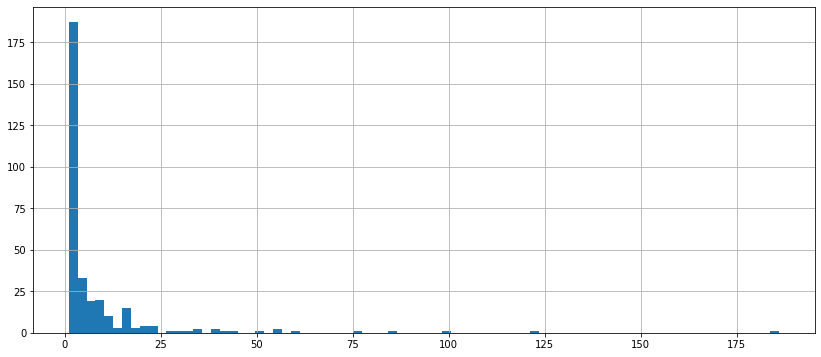

In [130]:
# your answer here
# Para mostrar la distribucion de frecuencia hacemos un histograma de las veces que los valores se repiten
orders[orders['Country'] == 'Spain']['amount_spent'].value_counts().hist(bins=80, figsize = (14,6))

#### Select all orders made in the month of August

In [131]:
# your answer here
orders[orders['month'] == 8]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [139]:
# your answer here

orders[orders['month'] == 8].groupby('Country').size().to_frame().sort_values(0, ascending=False)
# orders.loc[orders['month']==8,['Country']].value_counts()

,0
Country,
United Kingdom,23105
Germany,795
EIRE,593
France,569
Netherlands,280
Switzerland,267
Spain,252
Belgium,194
Israel,171


#### What's the  average amount of money spent by country

In [161]:
# your answer here
orders.groupby('Country').agg({'amount_spent': 'mean'}).sort_values('amount_spent', ascending=False)

,amount_spent
Country,
Netherlands,120.798282
Australia,116.895620
Japan,116.561900
Singapore,95.852658
Sweden,85.096075
Denmark,49.882474
Lithuania,47.458857
Lebanon,37.641778
EIRE,36.687745


#### What's the most expensive item?

In [162]:
# your answer here
orders[orders['UnitPrice'] == orders['UnitPrice'].max()]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [163]:
# your answer here
orders.groupby('year').agg({'amount_spent': 'mean'})

,amount_spent
year,
2010,21.892733
2011,22.430074
